In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def load_matrix(address):
    """Loads data set and returns training set X and output y"""
    data_set = np.loadtxt(address, delimiter=",")
    x, y = data_set[:, :-1], data_set[:, -1]
    y = y.reshape(y.shape[0], 1)
    return x, y

In [3]:
def feature_scaling(x):
    """Implements feature scaling on the training set"""
    mean = np.mean(x, axis=0)
    std_dev = np.std(x, axis=0)
    mean = mean.reshape((1, x.shape[1]))
    std_dev = std_dev.reshape((1, x.shape[1]))
    x = x - mean
    x = x/std_dev
    return x, mean, std_dev

In [4]:
def initialize_parameters(size):
    """Initializes parameters and bias and returns them"""
    w, b = np.zeros((size, 1)), 0
    return w, b

In [5]:
def predict(x, w, b):
    """Predicts the output based on current weights and biases"""
    predictions = np.dot(x, w)+b
    return predictions

In [6]:
def compute_cost(x, y, w, b, m):
    h = predict(x, w, b)
    cost = (1/(2*m)) * np.dot((h-y).T, h-y)
    return cost

In [7]:
def gradient_descent(x, y, w, b, m, n, iterations, learn_rate):
    J_hist = np.zeros((iterations,2))
    for i in range(iterations):
        delta = np.zeros((n, 1))
        J_hist[i][0] = i+1
        J_hist[i][1] = compute_cost(x, y, w, b, m)
        for j in range(m):
            x = training_set_x[j, :].reshape(1, n)
            delta = delta + (predict(x, w, b) - y[j][0]) * x.T
        w = w - (learn_rate/m) * delta
        b = b - (learn_rate/m) * np.sum(predict(training_set_x, w, b)-training_set_y)
    return w, b, J_hist

In [8]:
def plot_cost_history(J_history):
    plt.plot(J_history[:, 0], J_history[:, 1])
    plt.title("Cost History")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")

In [9]:
training_set_x, training_set_y = load_matrix("ex1data2.txt")
examples, features = training_set_x.shape[0], training_set_x.shape[1]

learning_rate = 0.1
num_iterations = 100
training_set_x, mu, sigma = feature_scaling(training_set_x)
weight, bias = initialize_parameters(features)

In [10]:
print("Running Gradient Descent...")
weight, bias, J_history = gradient_descent(training_set_x, training_set_y, weight, bias, examples, features, num_iterations, learning_rate)
print('Parameters found by gradient descent:\nWeight: ', weight)
print('\nBias: ', bias)
print('Final cost: ',J_history[-1][1])

Running Gradient Descent...
Parameters found by gradient descent:
Weight:  [[108803.37852266]
 [ -5933.9413402 ]]

Bias:  340403.61773803073
Final cost:  13595681005.467937


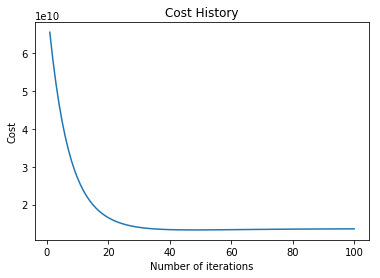

In [11]:
plot_cost_history(J_history)

In [12]:
a = (1650 - mu[0,0])/sigma[0,0]
b = (3 - mu[0,1])/sigma[0,1]
test = np.mat([a,b])
h = predict(test, weight, bias)
print("Estimated price of a 1650 sqft., 3 bedroom house: $", h[0,0])

Estimated price of a 1650 sqft., 3 bedroom house: $ 293214.16354571155


In [13]:
# Using Normal Equations

new_x, new_y = load_matrix("ex1data2.txt")

new_one = np.ones((examples,1))
new_x = np.concatenate([new_one,new_x],axis=1)

paras = np.dot(np.dot(np.linalg.inv(np.dot(new_x.T,new_x)), new_x.T), new_y)

test = np.mat([[1], [1650], [3]])
print("Estimated price of a 1650 sqft., 3 bedroom house: $", np.dot(paras.T, test))

Estimated price of a 1650 sqft., 3 bedroom house: $ [[293081.46433489]]


In [ ]:
#Close enough